
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [32]:
student_number = '400100554'
first_name = 'Seyed Mohammad'
last_name = 'Ojagh kazzazi'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [34]:
df = pd.read_csv('spotify.csv')
# Check the first few rows of the dataframe to understand its structure

# Select relevant features
relevant_features = ['track_name', 'acousticness', 'danceability', 'energy', 
                     'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                     'tempo', 'valence']

# Create a new dataframe with the selected features
df_relevant = df[relevant_features]

print(df_relevant.head())



                                          track_name  acousticness  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        0.1020   
1                    Memories - Dillon Francis Remix        0.0724   
2                    All the Time - Don Diablo Remix        0.0794   
3                  Call You Mine - Keanu Silva Remix        0.0287   
4            Someone You Loved - Future Humans Remix        0.0803   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.748   0.916          0.000000    0.0653    -2.634       0.0583   
1         0.726   0.815          0.004210    0.3570    -4.969       0.0373   
2         0.675   0.931          0.000023    0.1100    -3.432       0.0742   
3         0.718   0.930          0.000009    0.2040    -3.778       0.1020   
4         0.650   0.833          0.000000    0.0833    -4.672       0.0359   

     tempo  valence  
0  122.036    0.518  
1   99.972    0.693  
2  124.008    0.613  
3  121.956    0.277  


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [35]:
def standard_scaler(data):
    """Standardize the dataset (mean=0, std=1)."""
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mean) / std


# Separate track names from the features
track_names = df_relevant['track_name']
numerical_features = df_relevant.drop('track_name', axis=1)


# Apply the custom standard scaler to the numerical features
scaled_numerical_features = standard_scaler(numerical_features)


`Answer:`
### Why Standard Scaling is Important
Standard scaling is essential in clustering because it ensures each feature has the same weight in the distance calculations. Without scaling, features with larger ranges could dominate the clustering process, skewing the results.

#### Risks of Not Using Scaling
 - Disproportionate Influence:
    Features with larger numerical ranges can disproportionately affect the clustering outcome, leading to biased clusters [2].

 - Incorrect Clusters:
    Clusters might be incorrectly formed based on the magnitude of certain features instead of meaningful patterns in the data [5].

By using a standard scaler, you ensure all features contribute equally, improving the clustering accuracy.

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

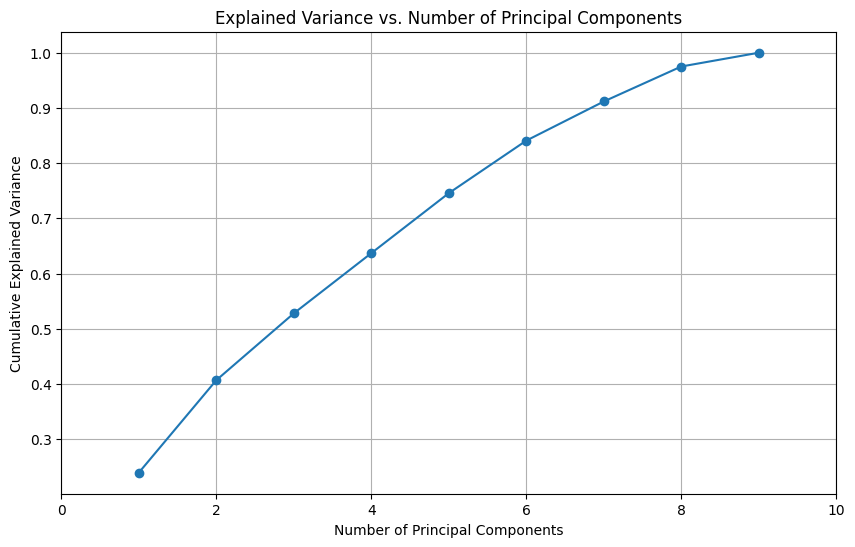

Number of principal components to retain: 8
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.539314 -0.547887 -0.824674 -0.730590 -0.308201 -0.493719 -0.482296   
1 -1.073641 -0.686911 -0.326229 -0.038567  1.416186  0.630854  0.143658   
2 -1.615155 -0.433865 -0.485313 -0.685422 -0.208597 -0.102517 -0.413479   
3 -1.582586  0.198196 -0.153358 -0.003994  0.143646 -0.946061  0.061610   
4 -1.080375 -0.486621 -0.676186 -1.008961 -0.251848  0.390992 -0.154344   

        PC8                                         track_name  
0 -0.574634  I Don't Care (with Justin Bieber) - Loud Luxur...  
1 -0.219583                    Memories - Dillon Francis Remix  
2 -0.011319                    All the Time - Don Diablo Remix  
3 -0.736790                  Call You Mine - Keanu Silva Remix  
4  0.253143            Someone You Loved - Future Humans Remix  


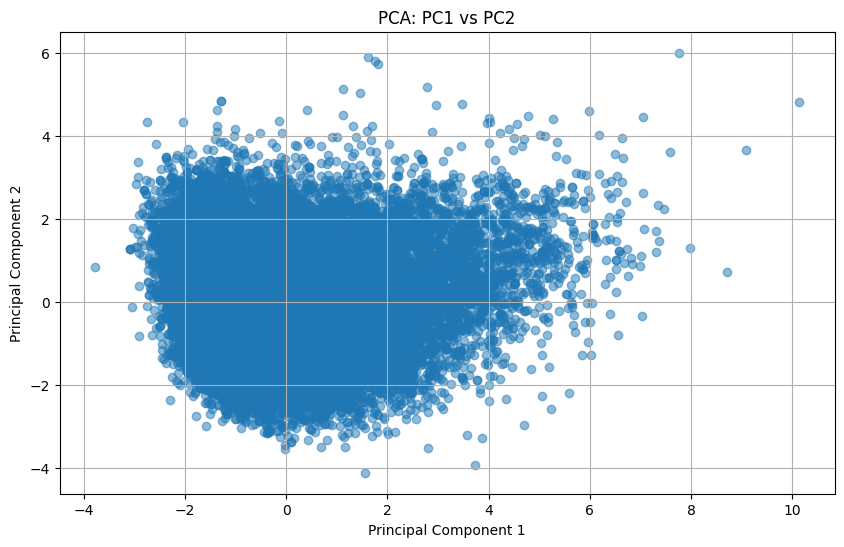

In [36]:
# Apply PCA
pca = PCA()
pca.fit(scaled_numerical_features)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.xlim(0, 10)  # Set x-axis range from 0 to 10
plt.show()

# Determine the number of components to retain within the range 0 to 10
cut_off_variance = 0.95
num_components = min(10, next(i for i, cumulative_variance in enumerate(cumulative_explained_variance) if cumulative_variance >= cut_off_variance) + 1)

print(f'Number of principal components to retain: {num_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=num_components)
reduced_features = pca.fit_transform(scaled_numerical_features)

# Combine track names with reduced features
df_reduced = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(num_components)])
df_reduced['track_name'] = track_names.values

print(df_reduced.head())

# Example plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid(True)
plt.show()


# Clustering

Implement K-means for clustering from scratch.

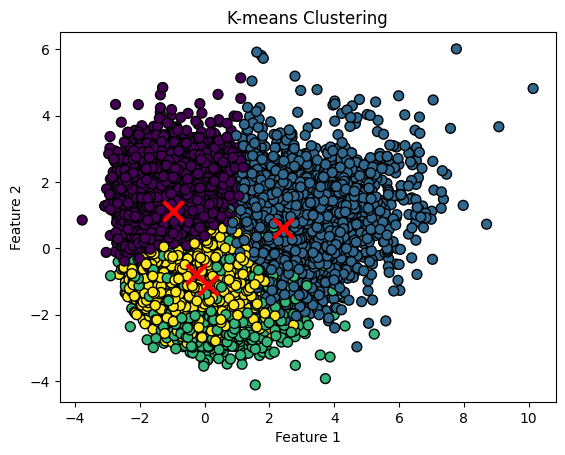

In [37]:
def initialize_centroids(X, k):
    """Initialize centroids using the K-means++ algorithm."""
    np.random.seed(42)
    centroids = [X[np.random.choice(range(X.shape[0]))]]
    for _ in range(1, k):
        distances = np.min([np.linalg.norm(X - centroid, axis=1) for centroid in centroids], axis=0)
        probabilities = distances / distances.sum()
        cumulative_probabilities = probabilities.cumsum()
        r = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids.append(X[j])
                break
    return np.array(centroids)

def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update the centroids by computing the mean of the data points assigned to each centroid."""
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(X, k, max_iters=100):
    """K-means clustering algorithm with K-means++ initialization."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

def plot_clusters(X, labels, centroids):
    """Plot the clustered data and centroids."""
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering')
    plt.show()

# Perform K-means clustering
k = 4
centroids, labels = k_means(reduced_features, k)

# Plot the results
plot_clusters(reduced_features, labels, centroids)

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

Number of clusters: 2


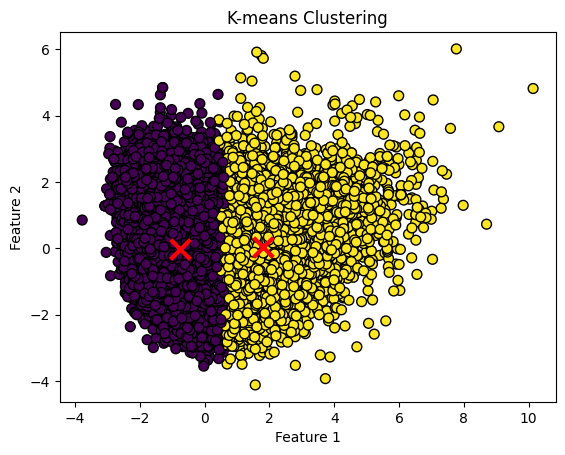

Number of clusters: 3


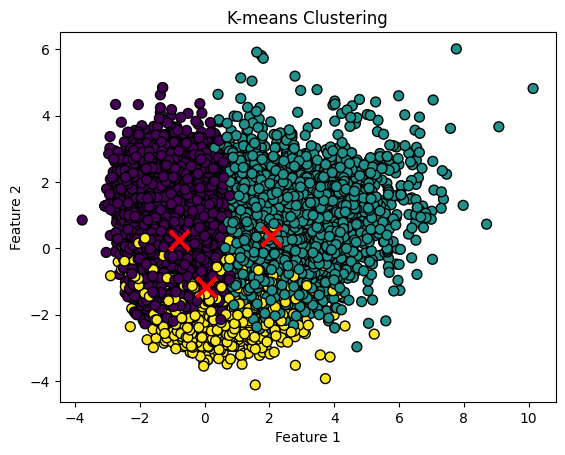

Number of clusters: 4


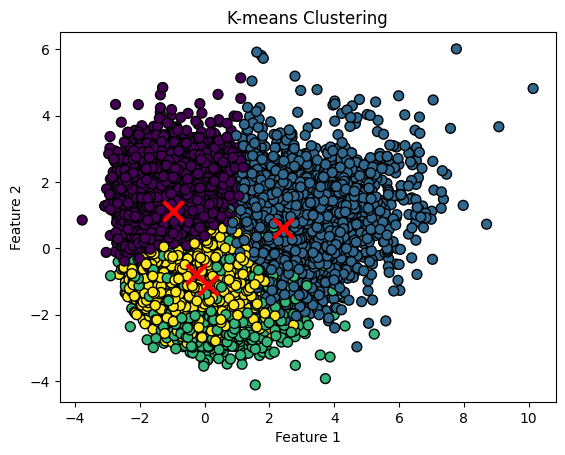

Number of clusters: 5


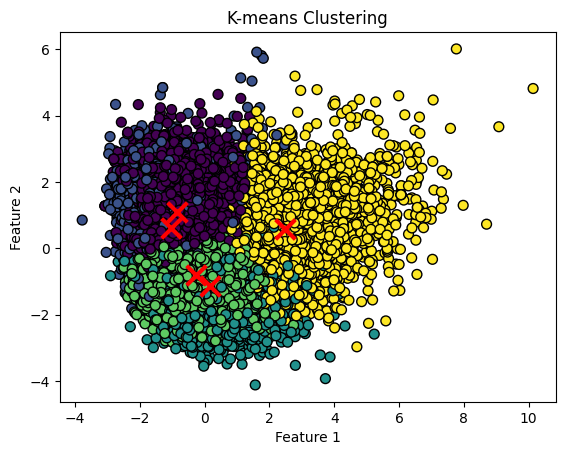

Number of clusters: 6


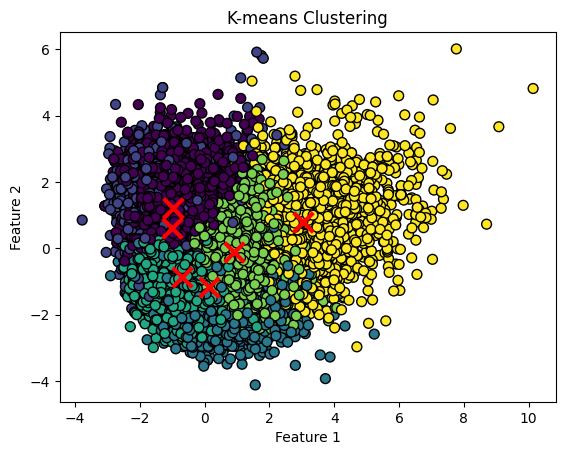

Number of clusters: 7


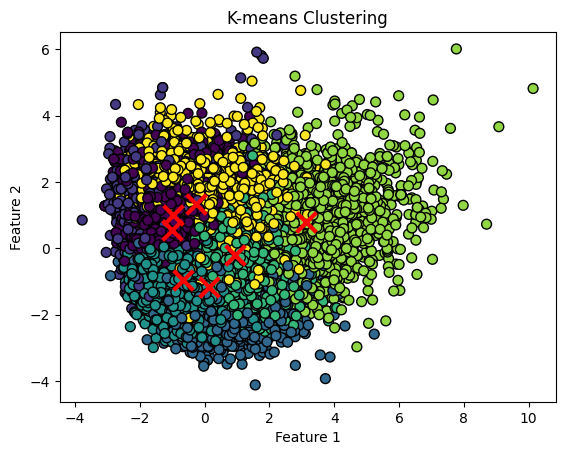

Number of clusters: 8


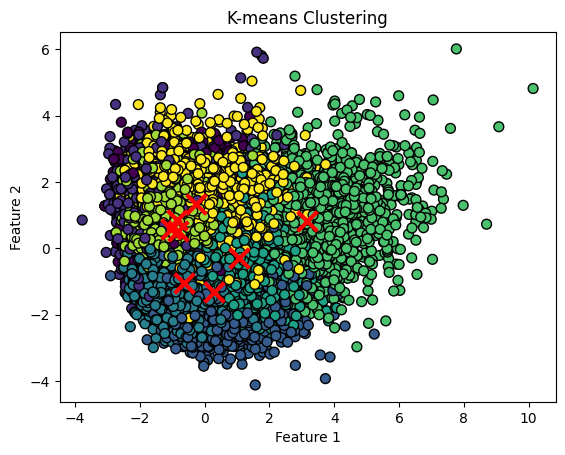

Number of clusters: 9


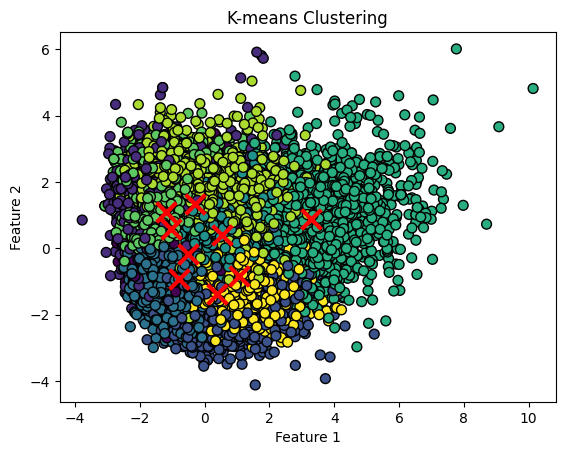

In [38]:
# Function to perform K-means clustering and plot results
def k_means_and_plot(X, k):
    centroids, labels = k_means(X, k)
    plot_clusters(X, labels, centroids)

# Perform K-means clustering for k = 2 to k = 9 and plot the results
for k in range(2, 10):
    print(f"Number of clusters: {k}")
    k_means_and_plot(reduced_features, k)

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

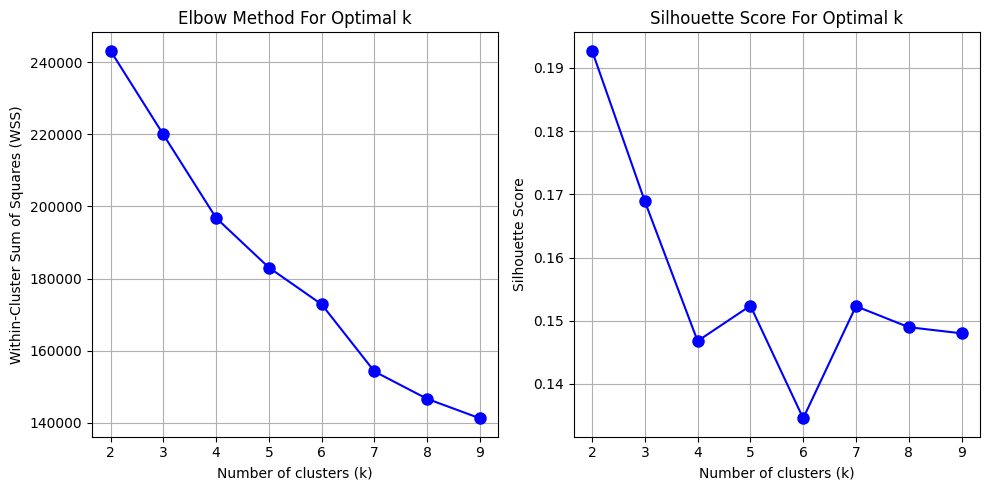

In [45]:
wss = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    centroids, labels = k_means(reduced_features, k)
    wss.append(np.sum((reduced_features - centroids[labels])**2))
    silhouette_scores.append(silhouette_score(reduced_features, labels))

    
# Plot WSS
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, wss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [48]:
# Randomly select two songs from each cluster and check their proximity
def sample_check(df, k):
    samples = []
    for cluster in range(k):
        cluster_songs = df[df['cluster'] == cluster]
        if len(cluster_songs) >= 2:
            samples.append(cluster_songs.sample(2))
    return samples

for k in K :
    centroids, labels = k_means(reduced_features, k)
    df_reduced['cluster'] = labels
    samples = sample_check(df_reduced, k)


    for idx, sample in enumerate(samples):
        print(f"Cluster {idx} samples:\n", sample, "\n")

    for idx, sample in enumerate(samples):
        song1, song2 = sample.iloc[0], sample.iloc[1]
        distance = np.linalg.norm(song1[['PC1', 'PC2']].values - song2[['PC1', 'PC2']].values)
        print(f"Distance between two songs in Cluster {idx}: {distance}")

Cluster 0 samples:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
15570 -1.536064  0.886098  0.073381 -1.490098 -1.200707  0.516975 -0.092153   
19859 -0.219843 -1.175936  0.396084  0.641354 -0.042206  0.030125  0.898706   

            PC8                                         track_name  cluster  
15570  0.931517                                             Memory        0  
19859 -1.139430  Vai malandra (feat. Tropkillaz & DJ Yuri Martins)        0   

Cluster 1 samples:
             PC1       PC2       PC3       PC4       PC5      PC6       PC7  \
6273   1.937222 -1.851746  0.571091  0.456498 -0.433499 -0.41892 -0.586627   
28264  1.201570 -0.661405  1.418676  0.679253 -0.256327 -0.27235 -0.779088   

            PC8 track_name  cluster  
6273  -0.228059   Time Out        1  
28264 -0.213633  One Dance        1   

Distance between two songs in Cluster 0: 2.4463075331204145
Distance between two songs in Cluster 1: 1.3993196461476731
Cluster 0 sampl

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

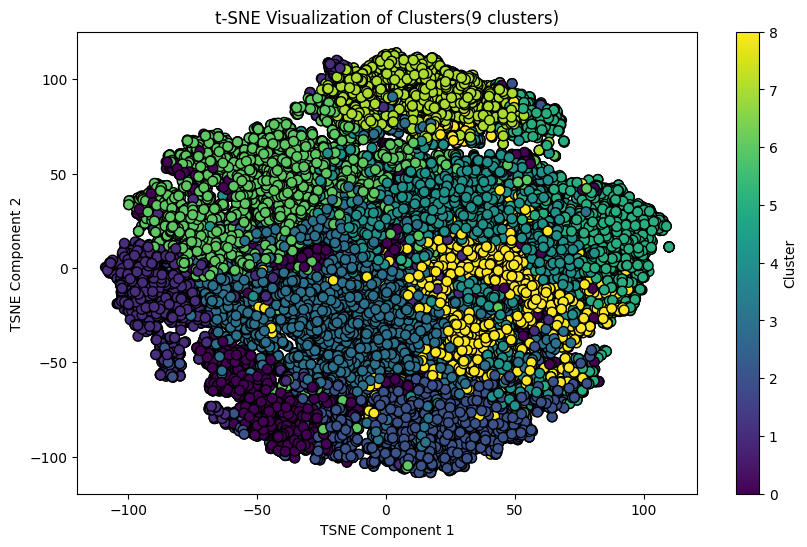

In [50]:
# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_numerical_features)

df_tsne = pd.DataFrame(tsne_features, columns=['TSNE1', 'TSNE2'])

centroids, labels = k_means(reduced_features, 9)
df_tsne['cluster'] = labels


plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE Visualization of Clusters(9 clusters)')
plt.colorbar(label='Cluster')
plt.show()